In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


- **Pandas**: Used for handling structured data, such as reading CSV files, cleaning missing values, and organizing datasets into DataFrames.  

- **NumPy**: Enables efficient numerical computations, including mathematical operations and matrix manipulations.  

- **Matplotlib**: Helps in creating visualizations like plots, graphs, and regression lines to analyze data trends.  

- **Matplotlib Axes**: Provides customization options for modifying axis labels, limits, and scales in plots.  

- **FuncAnimation (from Matplotlib)**: Allows dynamic visualizations by updating plots frame by frame, useful for tracking the training progress of a model over iterations.

In [2]:

data = pd.read_csv("data_for_lr.csv")
data

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


This code snippet loads a dataset from a CSV file, processes it by removing missing values, and then splits it into training and validation datasets. Here’s a step-by-step explanation:

### **1. Load Dataset:**
- The dataset is loaded from a CSV file (data_for_lr.csv) using **pandas**.
- The data variable stores the loaded dataset.

### **2. Handle Missing Values:**
- The dropna() function removes any rows with missing values (NaN) to ensure clean data before training.

### **3. Split Data into Training and Validation Sets:**
#### **Training Set:**
- train_input contains the **first 500 values** of column x, reshaped into a **(500,1) matrix**.
- train_output contains the **first 500 values** of column y, also reshaped into **(500,1)**.
- This dataset is used to train the linear regression model.

#### **Validation (Testing) Set:**
- test_input contains values **from index 500 to 699** of column x, reshaped into **(199,1)**.
- test_output contains values **from index 500 to 699** of column y, reshaped into **(199,1)**.
- This dataset is used to test the model’s performance after training.


In [4]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output)  
        dm = 2 * np.mean(np.multiply(train_input, df))  
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1
 
        self.loss = [] 
 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 
 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
             
            predictions = self.forward_propagation(train_input) 

            cost = self.cost_function(predictions, train_output) 
 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            self.update_parameters(derivatives, learning_rate) 
 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c'])  
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
    
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss 




1. **Initialization:**  
   - The model is initialized with an empty dictionary to store the parameters (m for slope and c for intercept).

2. **Forward Propagation:**  
   - It computes predictions using the linear equation:  
     \[
     y = mx + c
     \]
   - This function returns predicted values for the given input.

3. **Cost Function:**  
   - It calculates the **Mean Squared Error (MSE)**, which measures how far predictions deviate from actual values.  
   - A lower cost means the model is making better predictions.

4. **Backward Propagation:**  
   - It computes the derivatives of the cost function with respect to m and c.  
   - These derivatives (gradients) indicate how much to adjust m and c to minimize the error.

5. **Parameter Update:**  
   - Using **Gradient Descent**, it updates the values of m and c by subtracting the product of the learning rate and corresponding gradients.  
   - This step moves the model towards the optimal regression line.

6. **Training Function:**  
   - It initializes m and c randomly with negative values.  
   - It creates an animated **Matplotlib plot** to show how the regression line evolves over time.  
   - The training process runs for a given number of iterations (iters), updating parameters in each step.  
   - It prints the loss at every iteration to track model improvement.  
     

At the end of training, the function returns the **optimized parameters** (m and c) and the **history of loss values**. This helps analyze how well the model has learned over time.

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 13096.089563098782
Iteration = 1, Loss = 1585.1859151544577
Iteration = 1, Loss = 197.99674757805732
Iteration = 1, Loss = 30.82534787141588
Iteration = 2, Loss = 10.67936623757038
Iteration = 3, Loss = 8.25154751061822
Iteration = 4, Loss = 7.958960235639121
Iteration = 5, Loss = 7.923691588505736
Iteration = 6, Loss = 7.9194326372160795
Iteration = 7, Loss = 7.918910692619732
Iteration = 8, Loss = 7.9188390988744555
Iteration = 9, Loss = 7.918821778183606
Iteration = 10, Loss = 7.918810998862217
Iteration = 11, Loss = 7.9188010087227125
Iteration = 12, Loss = 7.9187911145638
Iteration = 13, Loss = 7.918781232847099
Iteration = 14, Loss = 7.918771353505233
Iteration = 15, Loss = 7.918761475324882
Iteration = 16, Loss = 7.918751598159743
Iteration = 17, Loss = 7.918741721992099
Iteration = 18, Loss = 7.918731846819725
Iteration = 19, Loss = 7.918721972642262
Iteration = 20, Loss = 7.91871209945958


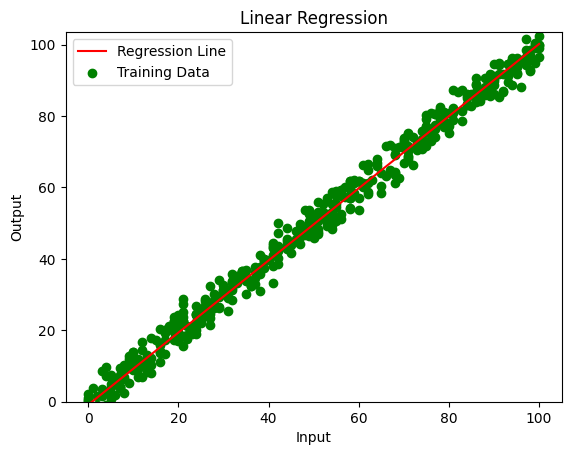

In [5]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


### **Conclusion**  

This linear regression model successfully learns a best-fit line for the given dataset through iterative optimization using gradient descent. The training process minimizes the loss function, improving predictions over time. The animated visualization provides an insightful representation of how the model evolves, updating the regression line dynamically. The final trained model, saved as a GIF, can be used for further analysis or prediction on new data. Additionally, testing the model on validation data ensures that it generalizes well beyond the training set, confirming its effectiveness in capturing underlying data patterns.